In [14]:
import pandas as pd

In [15]:
train = pd.read_csv("/Volumes/MicroSD/DataScience/Kaggle/Titanic/train.csv")

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
test = pd.read_csv("/Volumes/MicroSD/DataScience/Kaggle/Titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Explorer

In [17]:
import seaborn as sns

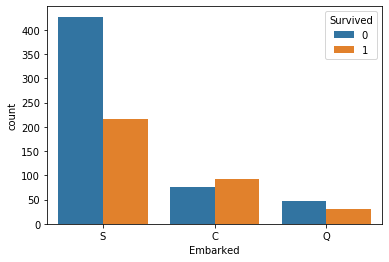

In [18]:
sns.countplot(data=train, x="Embarked", hue="Survived")

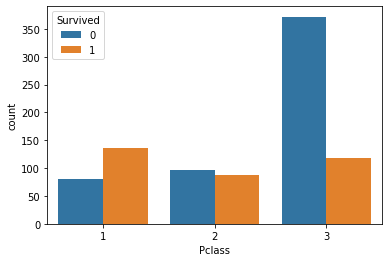

In [19]:
sns.countplot(data=train, x="Pclass", hue="Survived")

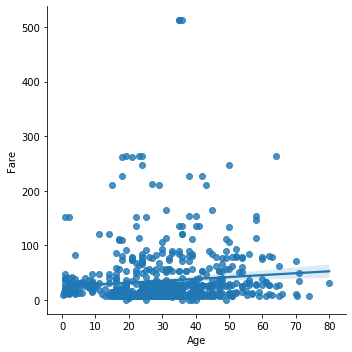

In [20]:
sns.lmplot(data=train, x="Age", y="Fare")

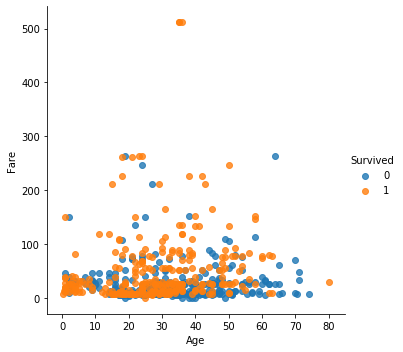

In [21]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

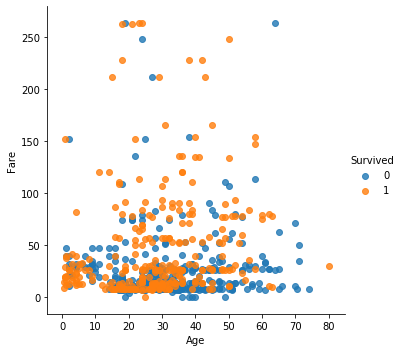

In [22]:
low_fare = train[train["Fare"] < 500]
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [23]:
## Train

In [24]:
# Feature(x) - Pclass, Sex, Fare, ...
# Label(y) - Survived (우리가 맞춰야 하는 값)

In [25]:
feature_names = ["Pclass"]
feature_names

['Pclass']

In [26]:
feature_names = ["Pclass"]
X = train[feature_names]
X.head()

,Pclass
0,3
1,1
2,3
3,1
4,3


In [27]:
label_name = "Survived"
y = train[label_name]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Use Decision Tree

In [34]:
# scikit-learn === sklearn
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# 1) fit (train) -> 2) predict (test)

In [35]:
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Visualize

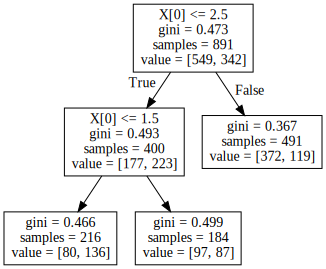

In [56]:
import graphviz
from sklearn.tree import export_graphviz

tree = export_graphviz(model)
graphviz.Source(tree)

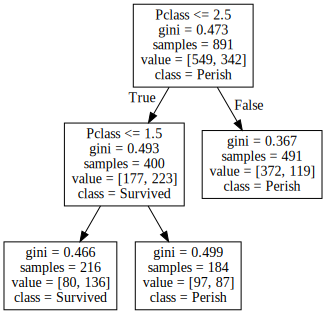

In [55]:
tree = export_graphviz(model,
                      feature_names = feature_names,
                      class_names = ["Perish", "Survived"])
graphviz.Source(tree)

## Predict

In [42]:
X_test = test[feature_names]
X_test.head()

,Pclass
0,3
1,3
2,2
3,3
4,3


In [43]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [45]:
prediction_list = model.predict(X_test)
prediction_list[0:5]

array([0, 0, 0, 0, 0])

## Submit

In [48]:
submit = pd.read_csv("/Volumes/MicroSD/DataScience/Kaggle/Titanic/gender_submission.csv")
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [49]:
submit["Survived"] = prediction_list
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [52]:
submit.to_csv("/Volumes/MicroSD/DataScience/Kaggle/Titanic/decision-tree.csv", index=False)

# Preprocessing

## Encode Sex

In [59]:
train["Sex_code"]=train["Sex"].replace("male", 0).replace("female",1)
train[["Sex", "Sex_code"]].head()

,Sex,Sex_code
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [60]:
test["Sex_code"]=test["Sex"].replace("male", 0).replace("female",1)
test[["Sex", "Sex_code"]].head()

,Sex,Sex_code
0,male,0
1,female,1
2,male,0
3,male,0
4,female,1


In [62]:
feature_names = ["Pclass", "Sex_code"]
feature_names

['Pclass', 'Sex_code']

In [63]:
X = train[feature_names]
X.head()

,Pclass,Sex_code
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


In [64]:
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

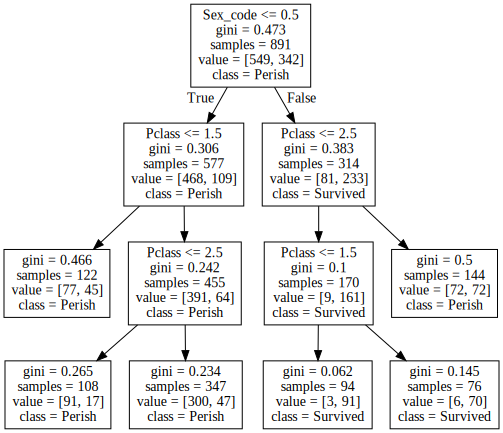

In [65]:
tree = export_graphviz(model,
                      feature_names = feature_names,
                      class_names = ["Perish", "Survived"])
graphviz.Source(tree)

In [66]:
feature_names = ["Pclass", "Sex_code", "Fare"]
feature_names

['Pclass', 'Sex_code', 'Fare']

## Fill in missing Fare

In [69]:
# NaN(Not a Number), null
train["Fare"] = train["Fare"].fillna(0)

In [70]:
X = train[feature_names]
X.head()

,Pclass,Sex_code,Fare
0,3,0,7.2500
1,1,1,71.2833
2,3,1,7.9250
3,1,1,53.1000
4,3,0,8.0500


In [71]:
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

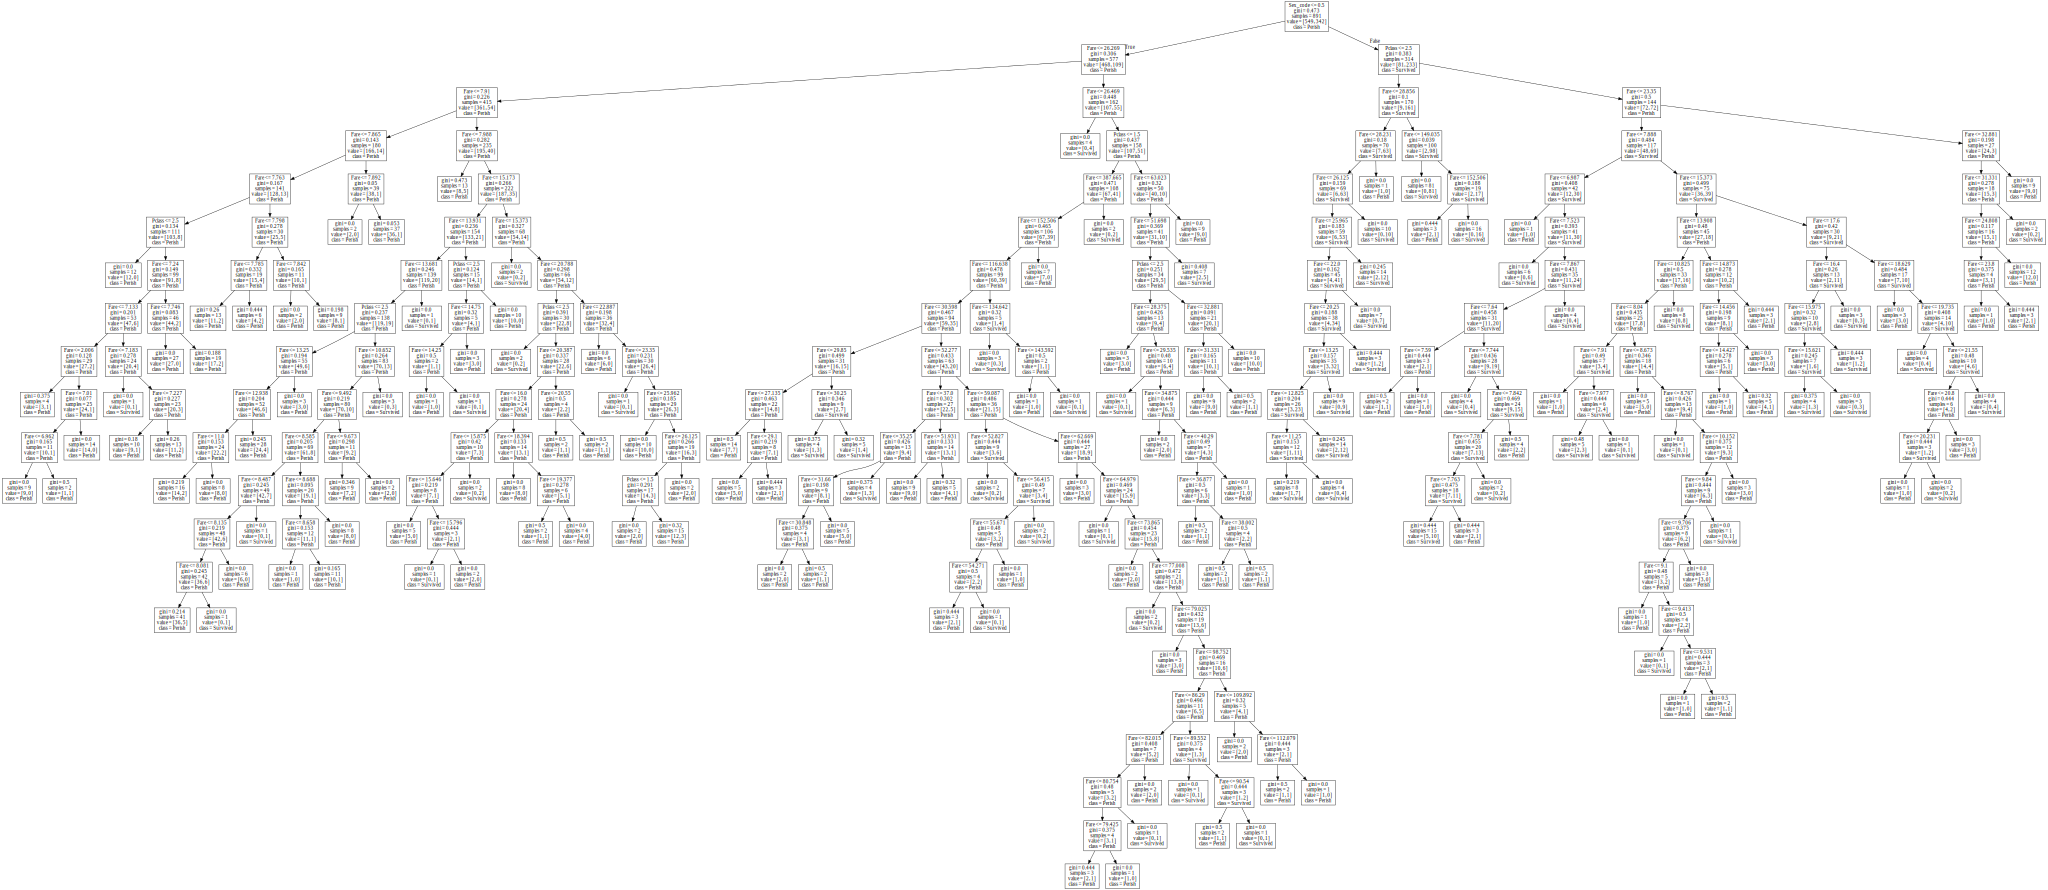

In [72]:
tree = export_graphviz(model,
                      feature_names = feature_names,
                      class_names = ["Perish", "Survived"])
graphviz.Source(tree)

In [ ]:
sddd